In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\david\Downloads\hygdata_v41.csv")
engine = create_engine('sqlite:///stars.db', echo=True)
sqlite_connection = engine.connect()
df.to_sql('stars', sqlite_connection, if_exists='replace', index=False)



2025-06-25 10:18:09,013 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-06-25 10:18:09,034 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("stars")
2025-06-25 10:18:09,035 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-06-25 10:18:09,037 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("stars")
2025-06-25 10:18:09,038 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-06-25 10:18:09,038 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2025-06-25 10:18:09,039 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-06-25 10:18:09,042 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='view' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2025-06-25 10:18:09,042 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-06-25 10:18:09,044 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("stars")
2025-06-25 10:18:09,044 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-06-25 10:18:0

119626

In [3]:
query = "SELECT * FROM stars LIMIT 100;"
df_result = pd.read_sql(query, con=engine)
#Filtered top 100

2025-06-25 10:18:13,734 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-06-25 10:18:13,735 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("SELECT * FROM stars LIMIT 100;")
2025-06-25 10:18:13,736 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-06-25 10:18:13,738 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("SELECT * FROM stars LIMIT 100;")
2025-06-25 10:18:13,739 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-06-25 10:18:13,741 INFO sqlalchemy.engine.Engine SELECT * FROM stars LIMIT 100;
2025-06-25 10:18:13,741 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-06-25 10:18:13,749 INFO sqlalchemy.engine.Engine ROLLBACK


In [4]:
print(df_result)

    id   hip        hd  hr    gl    bf proper        ra        dec      dist  \
0    0   NaN       NaN NaN  None  None    Sol  0.000000   0.000000    0.0000   
1    1   1.0  224700.0 NaN  None  None   None  0.000060   1.089009  219.7802   
2    2   2.0  224690.0 NaN  None  None   None  0.000283 -19.498840   47.9616   
3    3   3.0  224699.0 NaN  None  None   None  0.000335  38.859279  442.4779   
4    4   4.0  224707.0 NaN  None  None   None  0.000569 -51.893546  134.2282   
..  ..   ...       ...  ..   ...   ...    ...       ...        ...       ...   
95  95  95.0  224847.0 NaN  None  None   None  0.020134 -11.964034  149.2537   
96  96  96.0       NaN NaN  None  None   None  0.020330  13.975088   35.1494   
97  97  98.0  224851.0 NaN  None  None   None  0.020478 -52.798575  174.8252   
98  98  97.0  224849.0 NaN  None  None   None  0.020492 -21.404042  180.1802   
99  99  99.0  224855.0 NaN  None  None   None  0.021069  60.355282  877.1930   

    ...  bayer  flam   con  comp  comp_

In [5]:
print(df['mag'].value_counts())  # See how many unique values exist


mag
 8.69     506
 8.60     502
 8.27     498
 8.94     493
 8.52     490
         ... 
 14.59      1
 14.69      1
-26.70      1
 13.72      1
 17.90      1
Name: count, Length: 1422, dtype: int64


In [6]:
Q1 = df['mag'].quantile(0.10)
Q3 = df['mag'].quantile(0.90)
IQR = Q3 - Q1
lower_bound = Q1 -1.5 * IQR
upper_bound = Q3 +1.5 * IQR
df_filtered = df[(df['mag'] >= lower_bound) & (df['mag'] <= upper_bound)]
#filter outliers

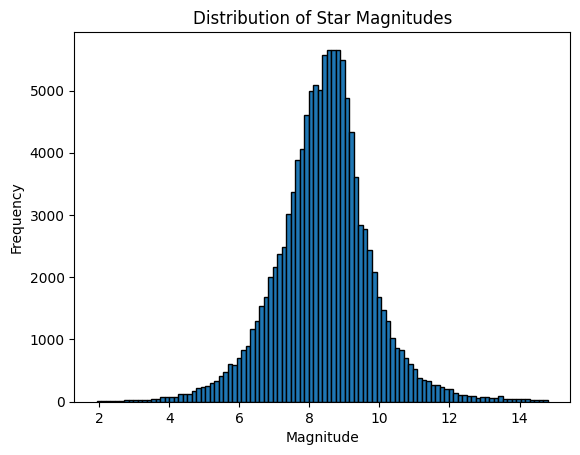

In [7]:
plt.hist(df_filtered['mag'], bins=100, edgecolor='black')  # Use more bins for finer lines
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Distribution of Star Magnitudes")
plt.show()

(116578, 5)


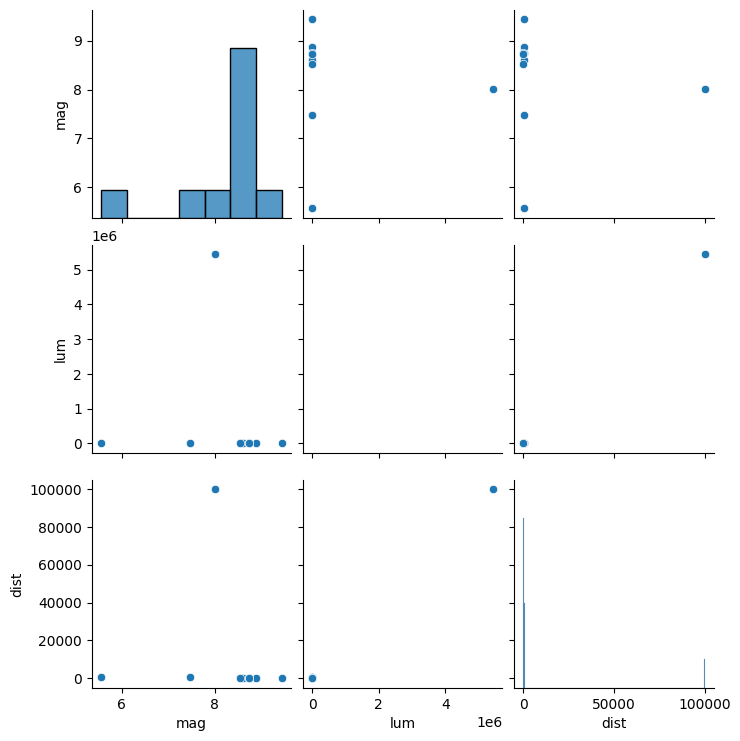

In [8]:
df_cleaned = df[['mag', 'spect', 'lum', 'dist','absmag']].dropna()
print(df_cleaned.shape)
df_sample=df_cleaned.sample(10)
sns.pairplot(df_sample[['mag', 'spect', 'lum', 'dist']])
plt.show()

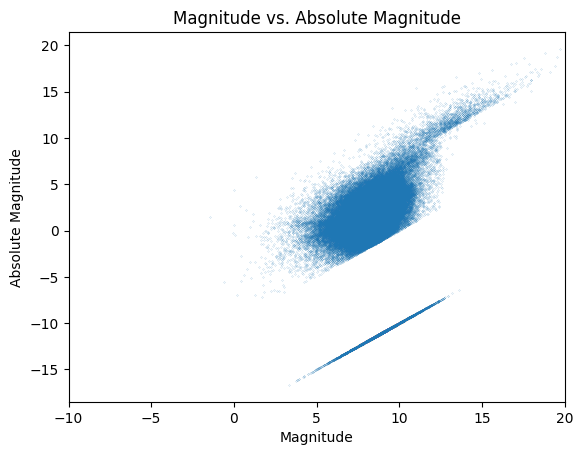

In [9]:
plt.scatter(df_cleaned['mag'], df_cleaned['absmag'],s=.01)
plt.xlabel('Magnitude')
plt.ylabel('Absolute Magnitude')
plt.title('Magnitude vs. Absolute Magnitude')
plt.xlim(-10,20)
plt.show()

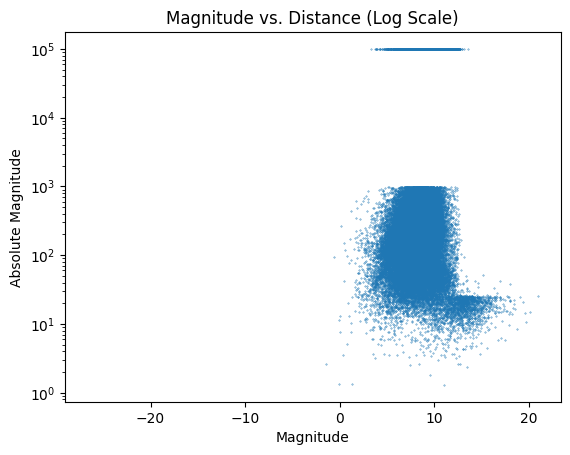

In [10]:
plt.scatter(df_cleaned['mag'], df_cleaned['dist'],s=.1)
plt.yscale('log')
plt.xlabel('Magnitude')
plt.ylabel('Absolute Magnitude')
plt.title('Magnitude vs. Distance (Log Scale)')
plt.show()

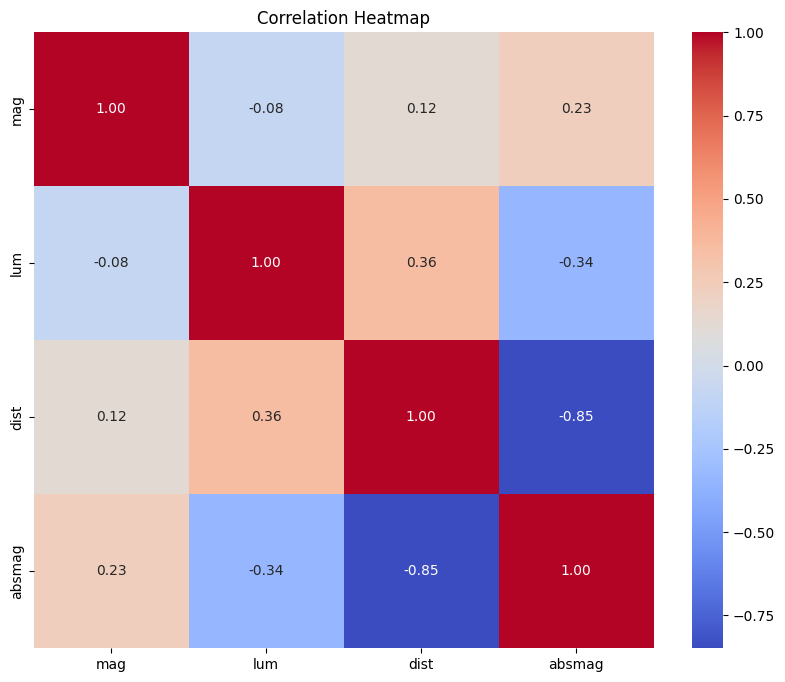

Pearson correlation between mag and dist: 0.12586488560270995


In [11]:
df_spec=df_cleaned[['mag', 'lum', 'dist','absmag']]
correlation_matrix = df_spec.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
correlation_value = df['mag'].corr(df['dist'])
print(f"Pearson correlation between mag and dist: {correlation_value}")


In [12]:
print(df.columns)

Index(['id', 'hip', 'hd', 'hr', 'gl', 'bf', 'proper', 'ra', 'dec', 'dist',
       'pmra', 'pmdec', 'rv', 'mag', 'absmag', 'spect', 'ci', 'x', 'y', 'z',
       'vx', 'vy', 'vz', 'rarad', 'decrad', 'pmrarad', 'pmdecrad', 'bayer',
       'flam', 'con', 'comp', 'comp_primary', 'base', 'lum', 'var', 'var_min',
       'var_max'],
      dtype='object')


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfl=df[['lum', 'dist', 'ci']].dropna()
X_scaled = scaler.fit_transform(dfl)

In [14]:
df['velocity_total'] = (df[['vx', 'vy', 'vz']]**2).sum(axis=1)**0.5
df['position_r'] = (df[['x', 'y', 'z']]**2).sum(axis=1)**0.5


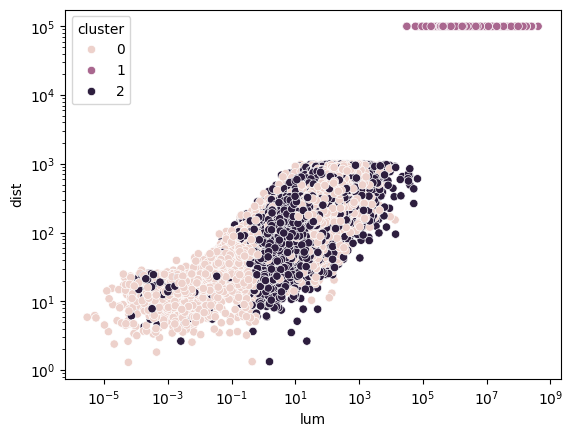

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
dfl['cluster'] = clusters
sns.scatterplot(x='lum', y='dist', hue='cluster', data=dfl)
plt.yscale('log')
plt.xscale('log')
plt.show()

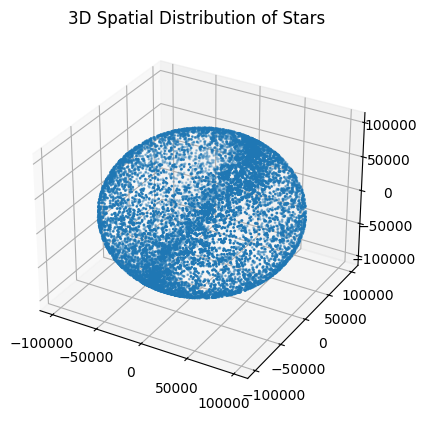

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], df['z'], s=1)
plt.title("3D Spatial Distribution of Stars")
plt.show()

In [17]:
import plotly.express as px
import plotly.io as pio


pio.renderers.default = 'browser' 

fig = px.scatter_3d(
    df, x='x', y='y', z='z',
    color='mag',  
    opacity=0.7,
    title='Interactive 3D Spatial Distribution of Stars'
)
fig.show()

In [18]:
sqlite_connection.close()
engine.dispose()
